In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn

In [2]:
%matplotlib inline

In [3]:
seaborn.set_style()

In [4]:
def count_people(df):
    """Count the number of people listed in the people column."""
    
    for index, row in df.iterrows():
        if pandas.notnull(row['people']):
            npeople = len(row['people'].split(','))
            row['people'] = npeople
        else:
            row['people'] = 0
    
    return df

## Demographics

### Field of research

In [5]:
research_field_df = pandas.read_csv('../data/anzsrc_research_groups.csv', header=0, encoding='utf-8-sig')
research_field_df = count_people(research_field_df)

In [6]:
research_divisions_gdf = research_field_df.groupby('research_division')

In [7]:
research_divisions_gdf.sum()['people']

research_division
agricultural and veterinary sciences           0
biological sciences                           10
built environment and design                   0
chemical sciences                              0
commerce, management, tourism and services     0
earth sciences                                 2
economics                                      0
education                                      0
engineering                                    2
environmental sciences                         1
history and archaeology                        1
information and computing sciences             0
language, communication and culture            1
law and legal studies                          0
mathematical sciences                          0
medical and health sciences                    8
philosophy and religious studies               0
physical sciences                              1
psychology and cognitive sciences              4
studies in creative arts and writing           0
st

In [8]:
research_divisions_gdf.get_group('biological sciences')

,people,research_group
32,1,biochemistry and cell biology
33,7,ecology
34,0,evolutionary biology
35,1,genetics
36,0,microbiology
37,0,physiology
38,0,plant biology
39,1,zoology
40,0,other biological sciences


In [9]:
research_divisions_gdf.get_group('medical and health sciences')

,people,research_group
81,0,medical biochemistry and metabolomics
82,0,cardiorespiratory medicine and haematology
83,0,clinical sciences
84,0,complementary and alternative medicine
85,0,denistry
86,1,human movement and sports science
87,0,immunology
88,1,medical microbiology
89,1,neurosciences
90,0,nursing


### Career stage

In [10]:
people_df = pandas.read_csv('../data/people.csv', header=0, encoding='utf-8-sig')

In [11]:
career_stage_gdf = people_df.groupby('career stage')

In [12]:
for career_stage, career_stage_df in career_stage_gdf:
    print(career_stage, len(career_stage_df))

masters 2
mid-career 3
phd 23
postdoc 2
research assistant 1


## Tools

### Programming languages

In [13]:
programming_language_df = pandas.read_csv('../data/derived/people_programming_languages.csv', header=0, encoding='utf-8-sig')

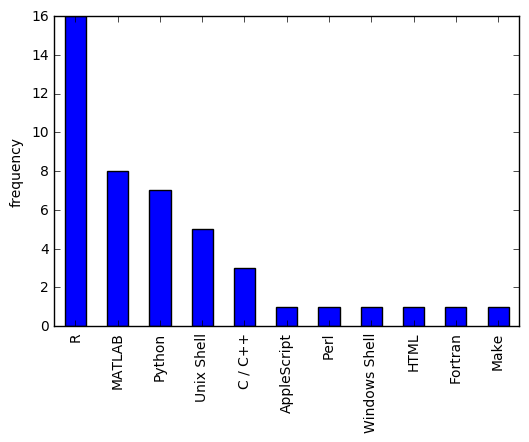

In [14]:
programming_language_df['tool'].value_counts().plot(kind='bar')
plt.ylabel('frequency')
plt.show()

### General data science tools

In [15]:
general_datasci_df = pandas.read_csv('../data/derived/people_general_datasci_tools.csv', header=0, encoding='utf-8-sig')

In [16]:
general_datasci_purpose_gdf = general_datasci_df.groupby('purpose')

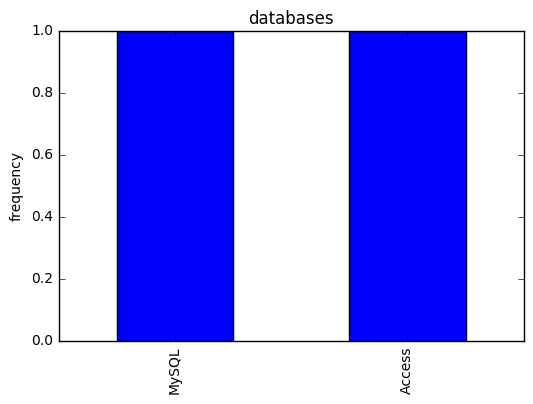

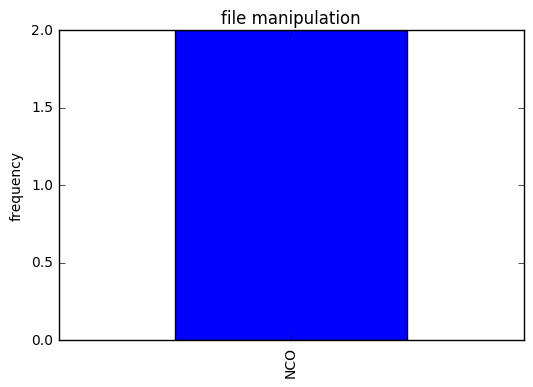

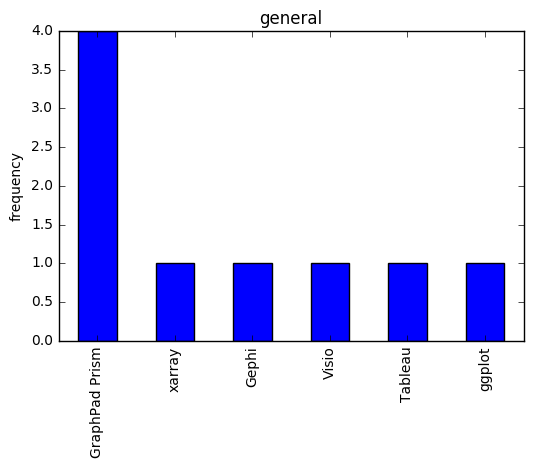

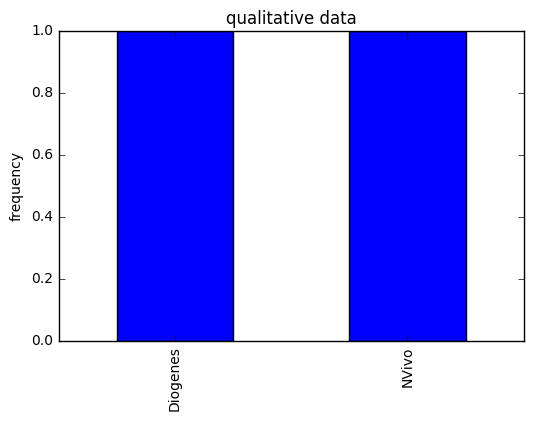

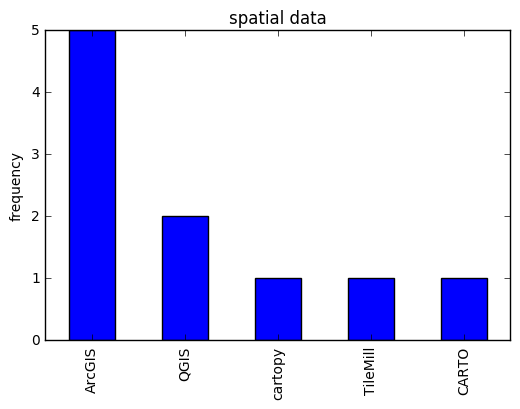

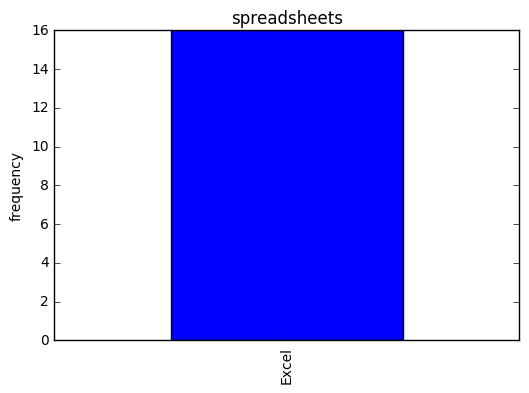

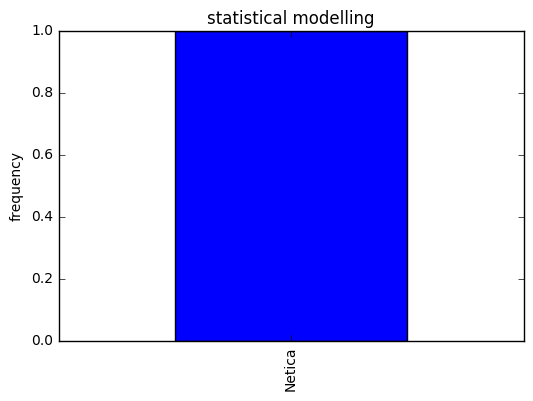

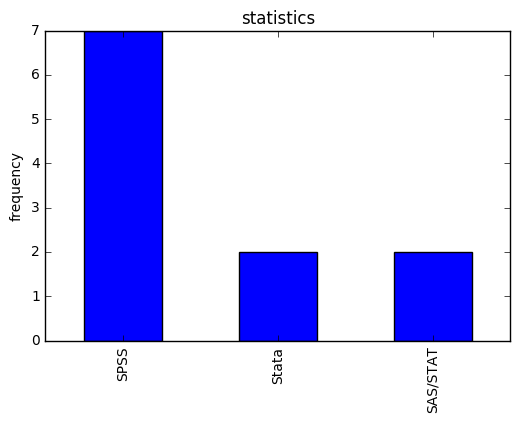

In [17]:
for purpose, purpose_df in general_datasci_purpose_gdf:
    purpose_df['tool'].value_counts().plot(kind='bar')
    plt.title(purpose)
    plt.ylabel('frequency')
    plt.show()
    print('\n')

### Support tools

In [18]:
support_tool_df = pandas.read_csv('../data/derived/people_support_tools.csv', header=0, encoding='utf-8-sig')

In [19]:
support_tool_gdf = support_tool_df.groupby(['category', 'task'])

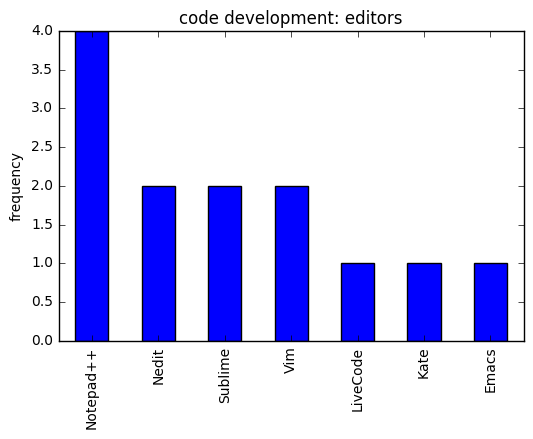

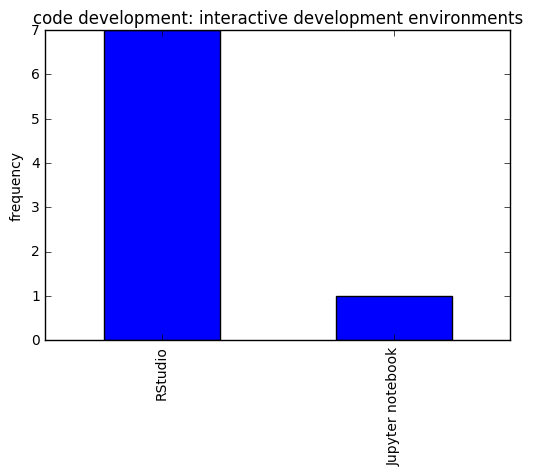

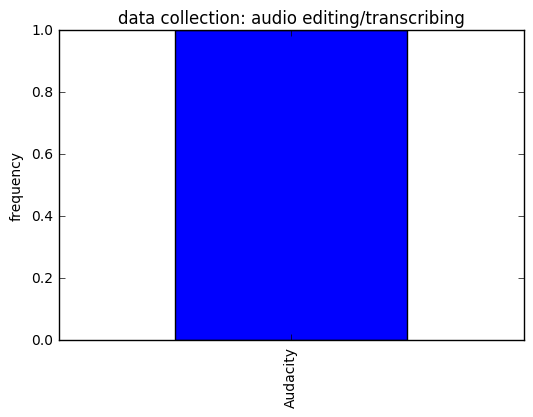

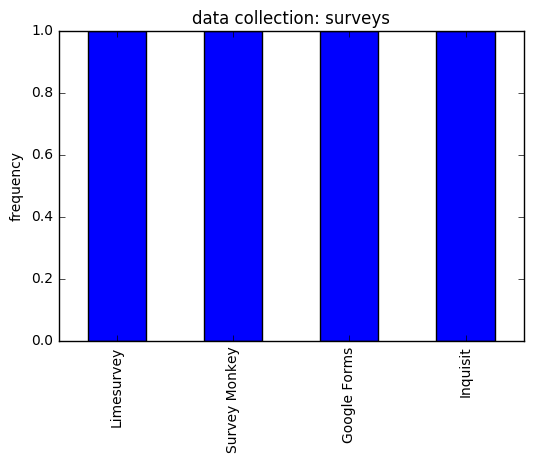

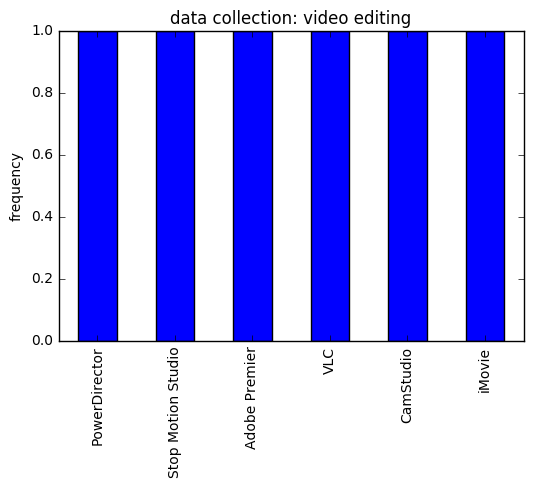

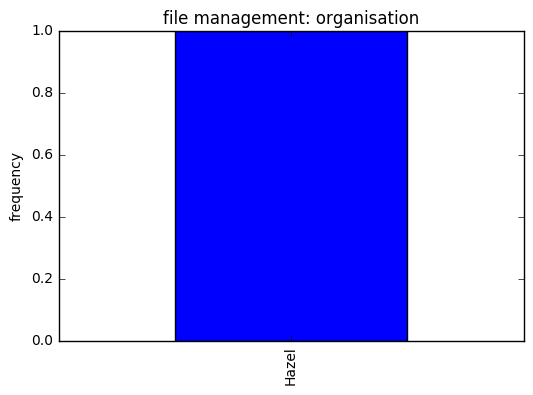

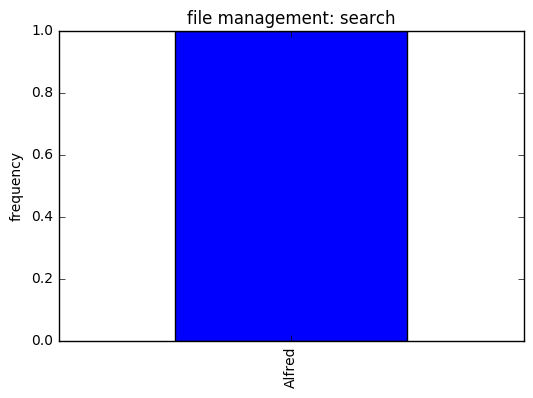

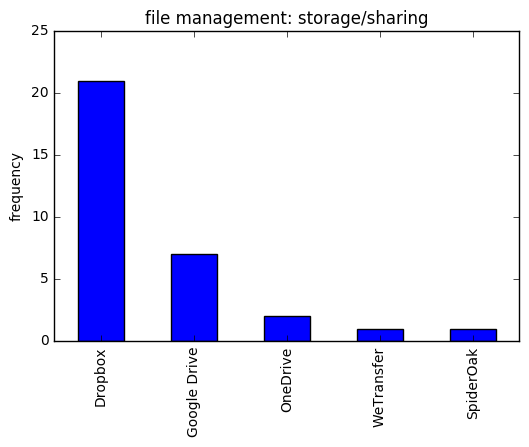

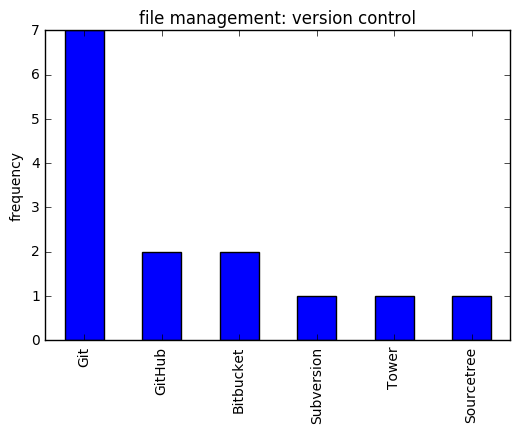

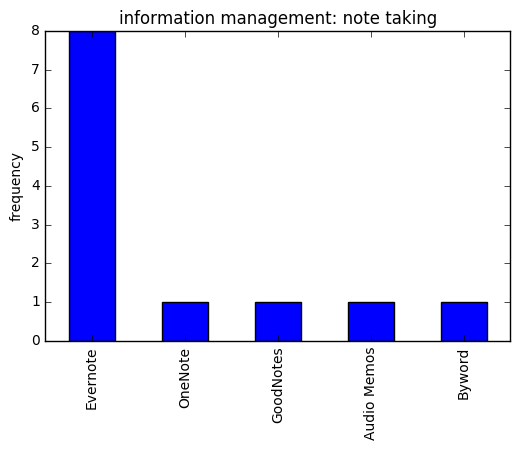

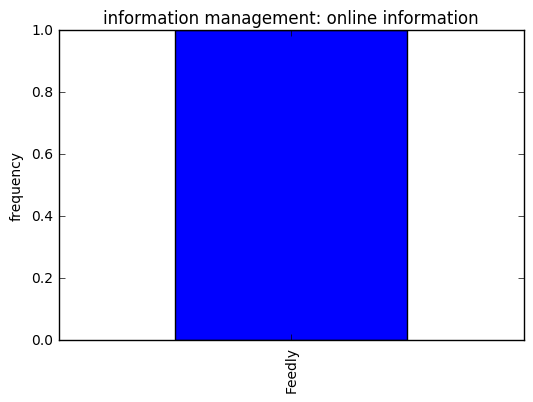

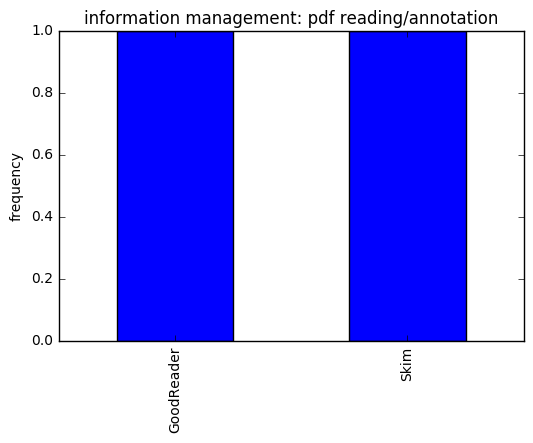

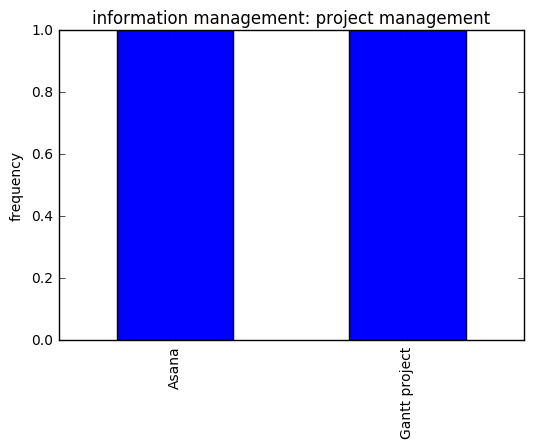

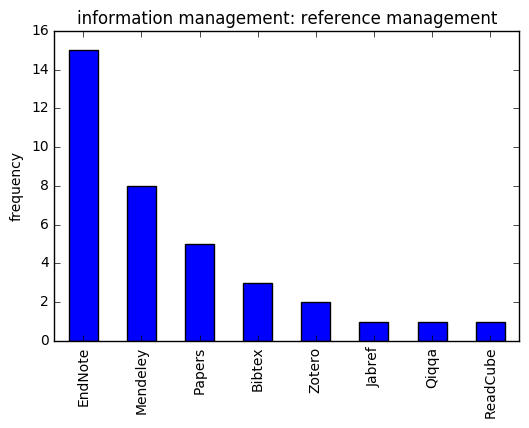

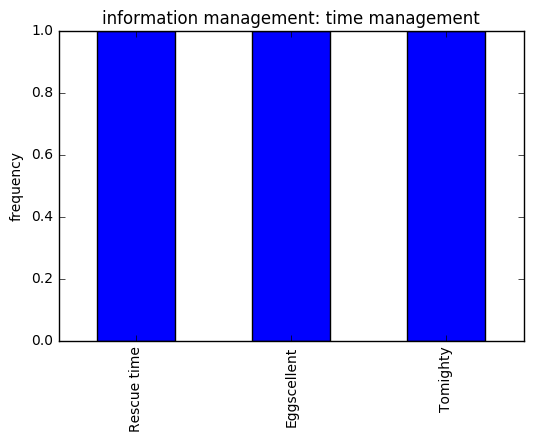

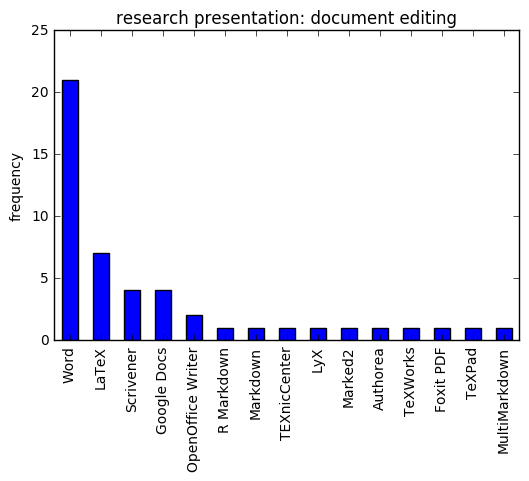

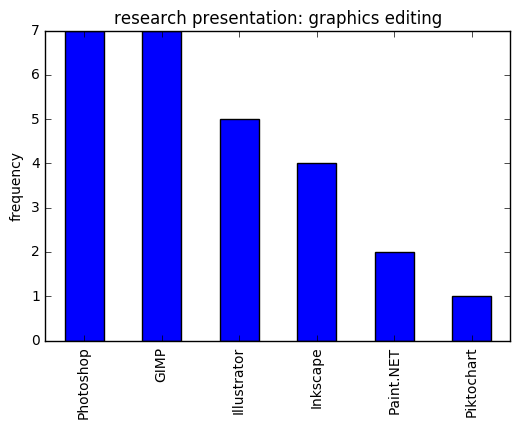

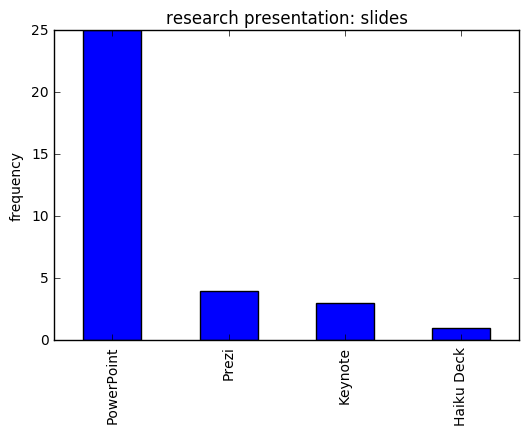

In [20]:
for category_task, task_df in support_tool_gdf:
    task_df['tool'].value_counts().plot(kind='bar')
    plt.title(category_task[0] + ': ' + category_task[1])
    plt.ylabel('frequency')
    plt.show()